<a href="https://colab.research.google.com/github/alammobaDar/CCMACLRL_EXERCISES_COM231ML/blob/main/Copy_of_Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [63]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [64]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [65]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [66]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [67]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [68]:
df_train.head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [70]:
df_train.isnull().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [71]:
df_train.duplicated().sum()

np.int64(0)

5. Check how many rows belong to each class

In [72]:
df_train['label'].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [73]:
df_train = df_train.drop_duplicates()
df_validation = df_validation.drop_duplicates()
df_test = df_test.drop_duplicates()

7. Remove rows with NaN values

In [74]:
df_train = df_train.dropna()
df_validation = df_validation.dropna()
df_test = df_test.dropna()

In [75]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


8. Convert all text to lowercase

In [76]:
df_train["text"] = df_train["text"].str.lower()
df_validation["text"] = df_validation["text"].str.lower()
df_test["text"] = df_test["text"].str.lower()

9. Remove digits, URLS and special characters

In [77]:
df_train["text"] = df_train["text"].str.replace(r"http\S+|www\S+", "", regex=True)
df_validation["text"] = df_validation["text"].str.replace(r"http\S+|www\S+", "", regex=True)
df_test["text"] = df_test["text"].str.replace(r"http\S+|www\S+", "", regex=True)

df_train["text"] = df_train["text"].str.replace(r"[^a-z\s]", "", regex=True)
df_validation["text"] = df_validation["text"].str.replace(r"[^a-z\s]", "", regex=True)
df_test["text"] = df_test["text"].str.replace(r"[^a-z\s]", "", regex=True)


10. Remove stop words

In [78]:
def preprocess_text(text):
  tokens = text.split()
  tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
  tokens = [stemmer.stem(word) for word in tokens]  # stemming
  return " ".join(tokens)

11. Use Stemming or Lemmatization

In [79]:
df_train['text'] = df_train['text'].apply(preprocess_text)
df_validation['text'] = df_validation['text'].apply(preprocess_text)
df_test['text'] = df_test['text'].apply(preprocess_text)

## C. Training your model

12. Put all text training data in variable **X_train**

In [80]:
X_train = df_train['text']

13. Put all training data labels in variable **y_train**

In [81]:
y_train = df_train['label']

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [82]:
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [83]:
model = MultinomialNB()

16. Train the model using `.fit()`

In [84]:
model.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [85]:
X_validation = df_validation['text']
y_validation = df_validation['label']

X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [86]:
print("Validation Results:")
print("Accuracy:", accuracy_score(y_validation, y_validation_pred))
print("Precision:", precision_score(y_validation, y_validation_pred))
print("Recall:", recall_score(y_validation, y_validation_pred))
print("F1-Score:", f1_score(y_validation, y_validation_pred))

Validation Results:
Accuracy: 0.8342857142857143
Precision: 0.8097719869706841
Recall: 0.8784452296819788
F1-Score: 0.8427118644067797


19. Create a confusion matrix using the **validation dataset**

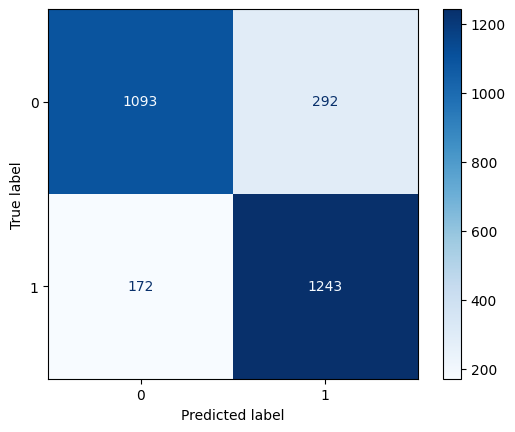

In [93]:
cm = confusion_matrix(y_validation, y_validation_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [95]:
X_test = df_test['text']
y_test = df_test['label']

X_test_transformed = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [96]:
print("Test Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))

Test Results:
Accuracy: 0.8348754448398576
Precision: 0.8044328552803129
Recall: 0.882689556509299
F1-Score: 0.8417462482946794


22. Create a confusion matrix using the **test dataset**

In [94]:
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Greens")
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [105]:
non_hate_word = "mahal kita sobra"

examples_preprocessed = [preprocess_text(non_hate_word)]
examples_transformed = vectorizer.transform(examples_preprocessed)
predictions = model.predict(examples_transformed)

print(f"Input: {non_hate_word} -> Prediction: {predictions}")

Input: mahal kita sobra -> Prediction: [0]


24. Test the model by providing a hate speech input. The model should predict it as 1

In [107]:
hate_words = "kinamumuhian kita"

examples_preprocessed = [preprocess_text(hate_words)]
examples_transformed = vectorizer.transform(examples_preprocessed)
predictions = model.predict(examples_transformed)

print(f"Input: {hate_words} -> Prediction: {predictions}")

Input: kinamumuhian kita -> Prediction: [1]
